<a href="https://colab.research.google.com/github/fariz123133/Visi-Komputer/blob/main/Jobsheet02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Praktikum 1

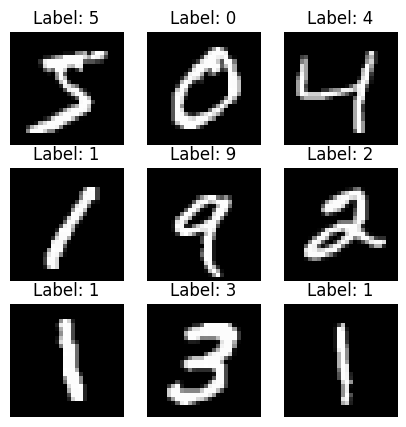

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh gambar (9 gambar)
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

# Normalisasi data
x_train = x_train / 255.0
x_test = x_test / 255.0


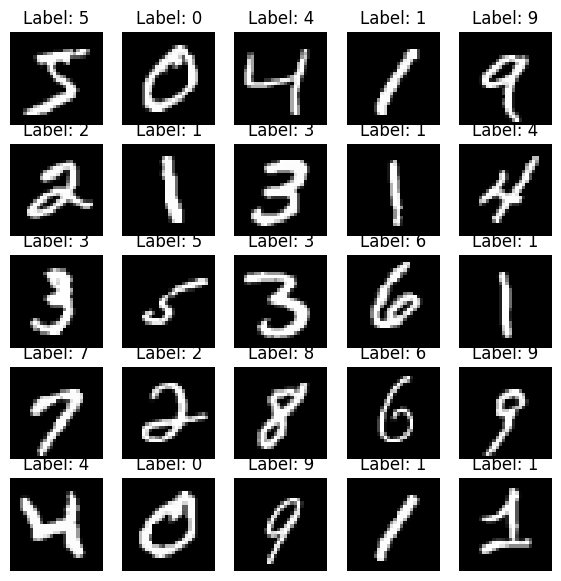

In [ ]:
# Tampilkan 25 gambar
plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


Praktikum 2

In [19]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten data
x_train_flat = x_train.reshape(len(x_train), -1)
x_test_flat = x_test.reshape(len(x_test), -1)

# SVM kernel linear
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])  # subset agar lebih cepat

y_pred = clf.predict(x_test_flat)
print("Akurasi (Linear):", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Akurasi (Linear): 0.3118


In [ ]:
# SVM kernel RBF
clf_rbf = svm.SVC(kernel='rbf', gamma='scale')
clf_rbf.fit(x_train_flat[:5000], y_train[:5000])

y_pred_rbf = clf_rbf.predict(x_test_flat)
print("Akurasi (RBF):", accuracy_score(y_test, y_pred_rbf))


Akurasi (RBF): 0.9513


Praktikum 3

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.8895 - loss: 0.3726 - val_accuracy: 0.9817 - val_loss: 0.0713
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 14ms/step - accuracy: 0.9801 - loss: 0.0669 - val_accuracy: 0.9840 - val_loss: 0.0616
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9860 - loss: 0.0439 - val_accuracy: 0.9853 - val_loss: 0.0519
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9906 - loss: 0.0287 - val_accuracy: 0.9863 - val_loss: 0.0506
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9934 - loss: 0.0211 - val_accuracy: 0.9878 - val_loss: 0.0497


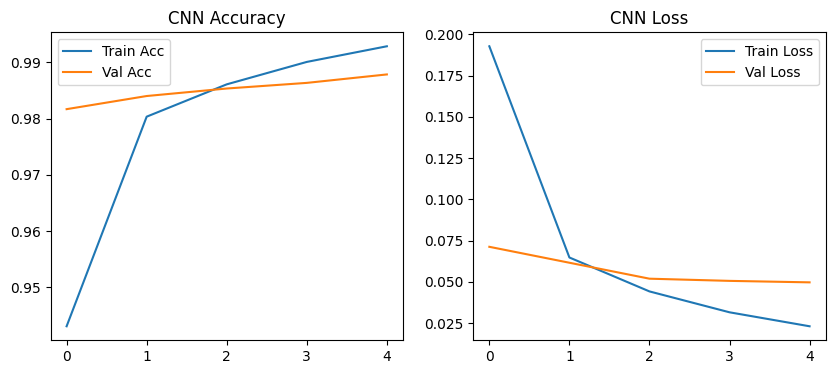

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1)
x_test_cnn = x_test.reshape(-1,28,28,1)

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# Plot hasil training
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(), plt.title("CNN Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(), plt.title("CNN Loss")

plt.show()


In [ ]:
# Tambahkan 1 Conv2D lagi sebelum Flatten
model2 = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history2 = model2.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 46s 26ms/step - accuracy: 0.9137 - loss: 0.2844 - val_accuracy: 0.9860 - val_loss: 0.0486
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9861 - loss: 0.0430 - val_accuracy: 0.9892 - val_loss: 0.0393
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 45s 27ms/step - accuracy: 0.9917 - loss: 0.0244 - val_accuracy: 0.9867 - val_loss: 0.0477
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9946 - loss: 0.0172 - val_accuracy: 0.9905 - val_loss: 0.0398
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 44s 26ms/step - accuracy: 0.9963 - loss: 0.0125 - val_accuracy: 0.9902 - val_loss: 0.0399


Praktikum 4

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 37ms/step - accuracy: 0.3727 - loss: 1.7166 - val_accuracy: 0.5566 - val_loss: 1.2488
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 51s 36ms/step - accuracy: 0.5839 - loss: 1.1919 - val_accuracy: 0.6204 - val_loss: 1.0870
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.6391 - loss: 1.0354 - val_accuracy: 0.6568 - val_loss: 0.9843
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.6710 - loss: 0.9391 - val_accuracy: 0.6772 - val_loss: 0.9487
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 84s 36ms/step - accuracy: 0.6954 - loss: 0.8740 - val_accuracy: 0.6908 - val_loss: 0.9254
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 34ms/step - accuracy: 0.7140 - loss: 0.8172 - val_accuracy: 0.6836 - val_loss: 0.9196
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 49s 35ms/step - accuracy: 0.7319 - loss: 0.7630 - val_accuracy: 0.6962 - val_loss: 0.8862
Epoch 8/10
1407/1407 ━━

In [ ]:
# Tambahkan Dropout
model2 = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, epochs=10, validation_split=0.1)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 61s 40ms/step - accuracy: 0.2699 - loss: 1.9573 - val_accuracy: 0.4896 - val_loss: 1.4892
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 78s 37ms/step - accuracy: 0.4406 - loss: 1.5282 - val_accuracy: 0.5658 - val_loss: 1.2593
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 35ms/step - accuracy: 0.5012 - loss: 1.3733 - val_accuracy: 0.6140 - val_loss: 1.1314
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.5350 - loss: 1.2977 - val_accuracy: 0.6194 - val_loss: 1.0847
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.5670 - loss: 1.2159 - val_accuracy: 0.6532 - val_loss: 0.9986
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 34ms/step - accuracy: 0.5873 - loss: 1.1525 - val_accuracy: 0.6528 - val_loss: 0.9860
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.5951 - loss: 1.1277 - val_accuracy: 0.6810 - val_loss: 0.9453
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.6171 -

Praktikum 5

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 556s 394ms/step - accuracy: 0.4567 - loss: 1.5532 - val_accuracy: 0.5620 - val_loss: 1.2410
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 531s 373ms/step - accuracy: 0.5780 - loss: 1.2120 - val_accuracy: 0.5878 - val_loss: 1.1675
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 522s 371ms/step - accuracy: 0.6030 - loss: 1.1433 - val_accuracy: 0.5970 - val_loss: 1.1406
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 593s 393ms/step - accuracy: 0.6159 - loss: 1.1012 - val_accuracy: 0.6102 - val_loss: 1.1066
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 562s 393ms/step - accuracy: 0.6254 - loss: 1.0658 - val_accuracy: 0.6076 - val_loss: 1.1328


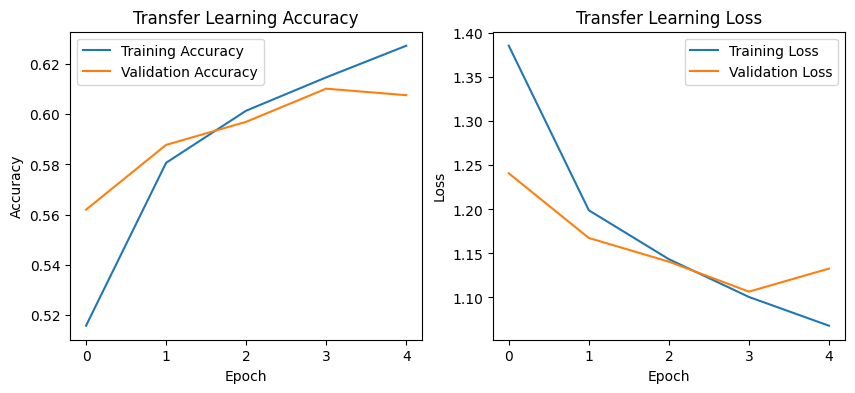

In [34]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

base_model = VGG16(weights='imagenet', include_top=False,  input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Praktikum 6


313/313 ━━━━━━━━━━━━━━━━━━━━ 107s 338ms/step
              precision    recall  f1-score   support

           0       0.72      0.61      0.66      1000
           1       0.53      0.81      0.64      1000
           2       0.47      0.57      0.51      1000
           3       0.47      0.37      0.42      1000
           4       0.58      0.47      0.52      1000
           5       0.56      0.52      0.54      1000
           6       0.61      0.69      0.65      1000
           7       0.73      0.60      0.66      1000
           8       0.74      0.71      0.72      1000
           9       0.61      0.58      0.60      1000

    accuracy                           0.59     10000
   macro avg       0.60      0.59      0.59     10000
weighted avg       0.60      0.59      0.59     10000



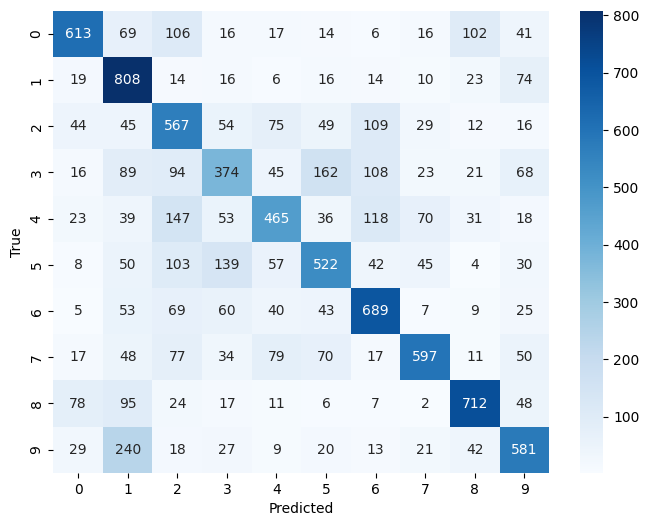

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(x_test).argmax(axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Penugasan

Saya menggunakan Praktikum D3

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

print("Akurasi test set:", model.evaluate(x_test_cnn, y_test, verbose=0)[1])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.8933 - loss: 0.3529 - val_accuracy: 0.9795 - val_loss: 0.0703
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - accuracy: 0.9818 - loss: 0.0619 - val_accuracy: 0.9843 - val_loss: 0.0561
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9861 - loss: 0.0429 - val_accuracy: 0.9875 - val_loss: 0.0485
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9923 - loss: 0.0263 - val_accuracy: 0.9877 - val_loss: 0.0497
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.9940 - loss: 0.0198 - val_accuracy: 0.9862 - val_loss: 0.0556
Akurasi test set: 0.9848999977111816


Saving 13.-pengenalan-tulisan-tangan-angka.png to 13.-pengenalan-tulisan-tangan-angka.png


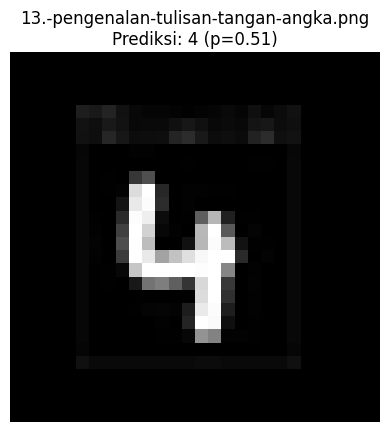

Rekap Prediksi (CNN):
- 13.-pengenalan-tulisan-tangan-angka.png -> 4 (p=0.512)


In [30]:
from google.colab import files
from PIL import Image, ImageOps

uploaded = files.upload()

def preprocess_to_mnist_28x28(img_pil):
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)
    arr = np.array(img).astype(np.uint8)
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)
    thr = np.mean(arr) * 0.8
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))
    img.thumbnail((20, 20), Image.Resampling.LANCZOS)
    w, h = img.size
    canvas = Image.new('L', (28, 28), color=0)
    canvas.paste(img, ((28 - w)//2, (28 - h)//2))
    arr = np.array(canvas).astype('float32') / 255.0
    arr = arr[..., None]
    return canvas, arr

results = []
for fname in uploaded.keys():
    img_pil = Image.open(fname)
    disp, x = preprocess_to_mnist_28x28(img_pil)
    x_batch = np.expand_dims(x, axis=0)

    probs = model.predict(x_batch, verbose=0)[0]
    pred = int(np.argmax(probs))
    conf = float(np.max(probs))
    results.append((fname, pred, conf))

    plt.imshow(disp, cmap='gray')
    plt.title(f"{fname}\nPrediksi: {pred} (p={conf:.2f})")
    plt.axis('off')
    plt.show()

print("Rekap Prediksi (CNN):")
for r in results:
    print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")
